In [1894]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1895]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1896]:
df.duplicated().sum()

0

so there are no duplicate values present in the data.

In [1897]:
df=df.drop(columns=['PassengerId','Name'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


The passenger Id & name column has no impact on target as it was irrelavant column so we dropped them-

In [1898]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              

In [1899]:
df['Survived'].nunique()

2

Survived is our target column which has two classes so it is a binary classification problem.

In [1900]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

these are the names of our columns.

In [1901]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Ticket & sex column has object data other than that all columns are with either integer data or float data.

In [1902]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age & cabin column has null values so we will remove them going further.

<AxesSubplot:>

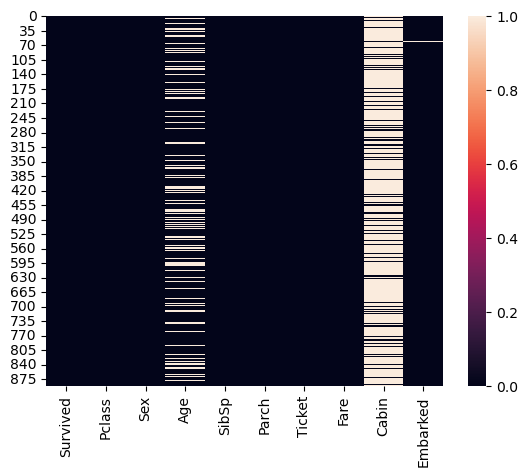

In [1903]:
sns.heatmap(df.isnull())

it is clearly visible Age & Cabin column has null values.

In [1904]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


so in our data frame there are three types of data are there with 891 rows.

In [1905]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [1906]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [1907]:
# Data cleaning-

In [1908]:
df=df.drop(columns='Cabin',axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


Here i am dropping cabin column as this column contains many nan values & it is also contain object data.

In [1909]:
#Encoding-

In [1910]:
from sklearn.preprocessing import LabelEncoder

In [1911]:
x= LabelEncoder()

In [1912]:
df2=x.fit_transform(df[['Sex']])
pd.Series(df2)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [1913]:
df3=x.fit_transform(df[['Embarked']])
pd.Series(df3)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int32

In [1914]:
df['Sex']=df2
df['Embarked']=df3

In [1915]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35.0,1,0,113803,53.1000,2
4,0,3,1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,2
887,1,1,0,19.0,0,0,112053,30.0000,2
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,2
889,1,1,1,26.0,0,0,111369,30.0000,0


Here we have encoded sex & embarked column.

Here i will be dropping ticket column as it contains object data, the deatils which are not much necessary to our model 

In [1916]:
df=df.drop(columns=['Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [1917]:
df.corr().Survived

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.163517
Name: Survived, dtype: float64

Observations-

1. Here we can see that sex is Negetively correlated to the target variable by 54%.
2. Pclass column is 33% negetively correlated with target variable.
3. Fare is 25% positively correalted with target variable.
4. Embarked is 16% negetively correlated with target variable.
5. Parch is only 8% correlated with target variable.
6. SibSb is only 3% negetively correlated with target variable.
8. Age is only 7% negetively correlated with target variable 

In [1918]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

Now all data we have is either integer or a float no.

In [1919]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Here we can see that age column has null values which we will replace with imputing technique.

<AxesSubplot:>

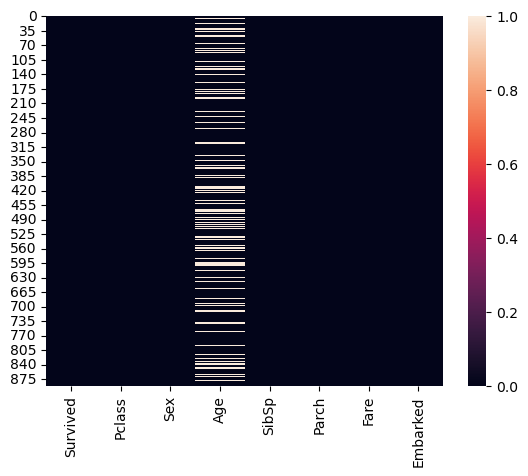

In [1920]:
sns.heatmap(df.isnull())

it can be clearly seen that age column has nan values.

In [1921]:
#Imputation of nan values-

In [1922]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [1923]:
si=SimpleImputer()

In [1924]:
x=make_column_transformer((si,['Age']),remainder='passthrough') 

In [1925]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [1926]:
df1=pd.DataFrame(x.fit_transform(df),columns=['Age','Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked'])
df1

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


In [1927]:
df1.isnull().sum()

Age         0
Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Here we can see that all the nan values atre being removed.

In [1928]:
df1.describe()

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,1.538721
std,13.002015,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.794231
min,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000
50%,29.699118,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,2.000000
75%,35.000000,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000
max,80.000000,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,3.000000


Observations-

1. The count of all the columns are same which means there are no nan values in the dataset.
2. The mean is greater than median in Survived,SibSp,Parch,Fare columns which means data is right skewed.
3. The mean is less than median in Pclass,Sex,Embarked column which means the data is left skewed in these columns.
4. There is a huge gap bw 75% and max values in Age,SibSp,Parch,Fare columns which means that there is outliers in the data of these columns.

In [1929]:
#Univariate analysis-

In [1930]:
import matplotlib.pyplot as plt

In [1931]:
df1

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


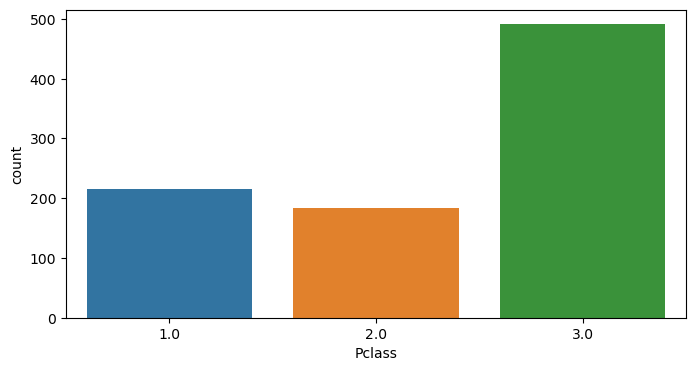

In [1932]:
plt.figure(figsize=(8,4))
sns.countplot(df1['Pclass'])
plt.show()

here we can observe that class3 is much more in nos. than class1 & class2.

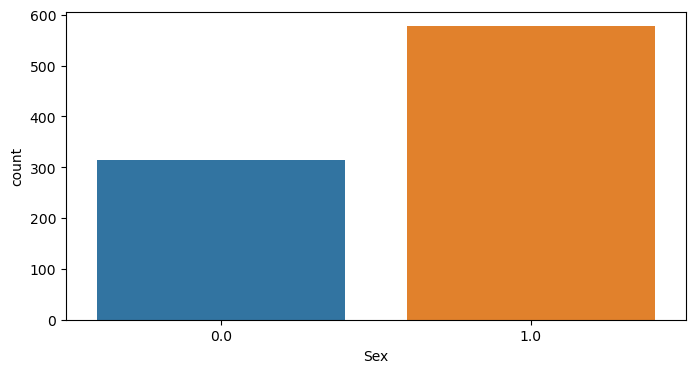

In [1600]:
plt.figure(figsize=(8,4))
sns.countplot(df1['Sex'])
plt.show()

Male are more in numbers than females in the dataset.

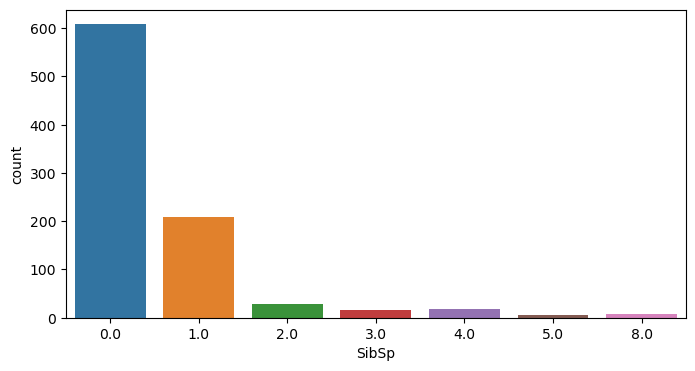

In [1601]:
plt.figure(figsize=(8,4))
sns.countplot(df1['SibSp'])
plt.show()

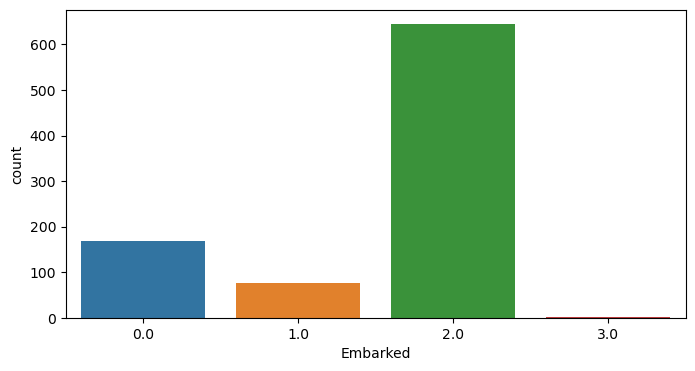

In [1602]:
plt.figure(figsize=(8,4))
sns.countplot(df1['Embarked'])
plt.show()

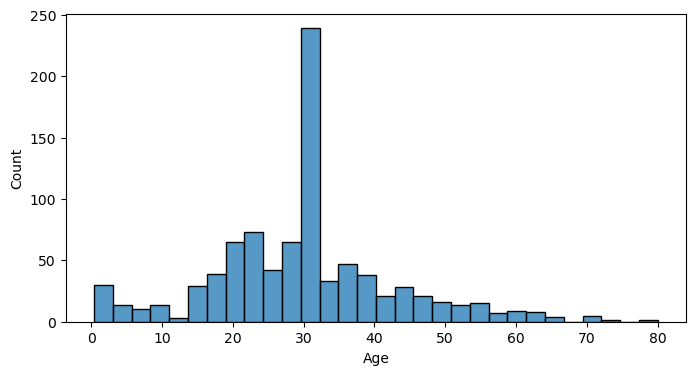

In [1603]:
plt.figure(figsize=(8,4))
sns.histplot(data=df1['Age'])
plt.show()

Pessanger with age 30-32 are more in numbers.

In [1604]:
df1['Pclass'].unique()

array([3., 1., 2.])

In [1605]:
#Bivariate analysis-

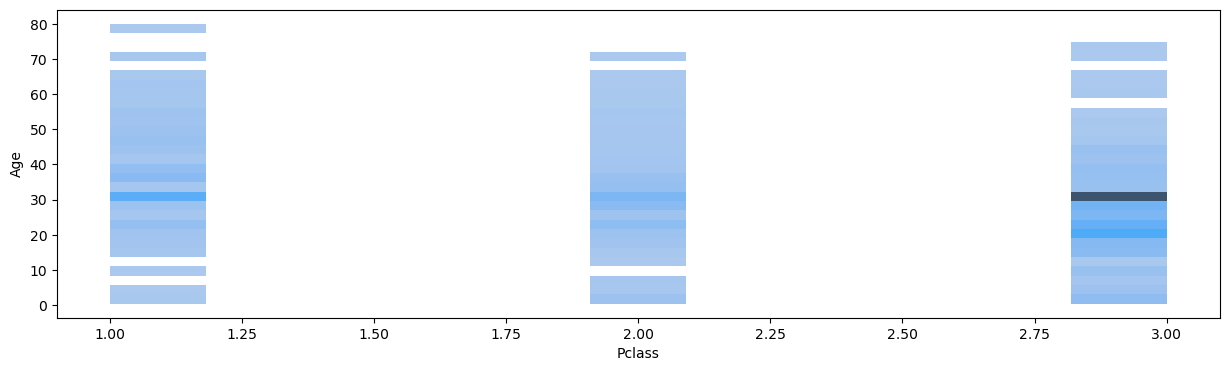

In [1606]:
plt.figure(figsize=(15,4))
sns.histplot(x='Pclass',y='Age',data=df1)
plt.show()

People with high age or older peoples are in class 1.

In [1607]:
df1

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


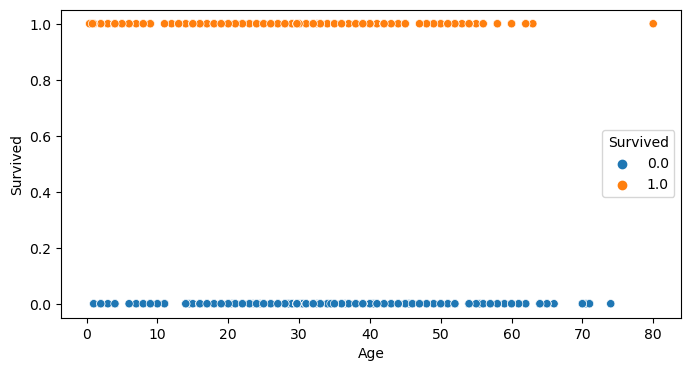

In [1608]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age',y='Survived',hue='Survived',data=df1)
plt.show()

Passenger with lower age has higher chance of surviving, as the age is increasing the chances of sinking also getting increasing.

In [1609]:
df1

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


<AxesSubplot:xlabel='Sex', ylabel='count'>

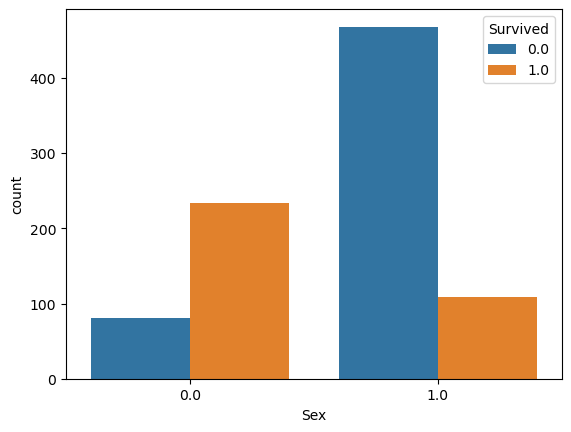

In [1610]:
sns.countplot(x='Sex',hue='Survived',data=df1)

Here it can be seen that females has higher chances of survival and male has very high chances of sinking.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

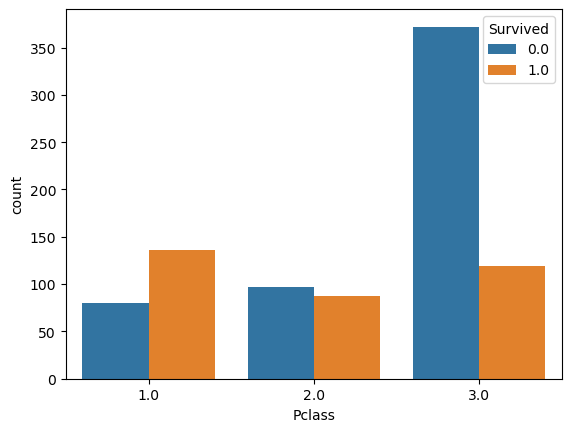

In [1611]:
sns.countplot(x='Pclass',hue='Survived',data=df1)

1. Passenger with class 3 has very high chances of sinking.
2. Passenger with class 1 has higher chances of surviving.
3. Passenger with class 2 has almost equal chances of surviving & sinking. 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

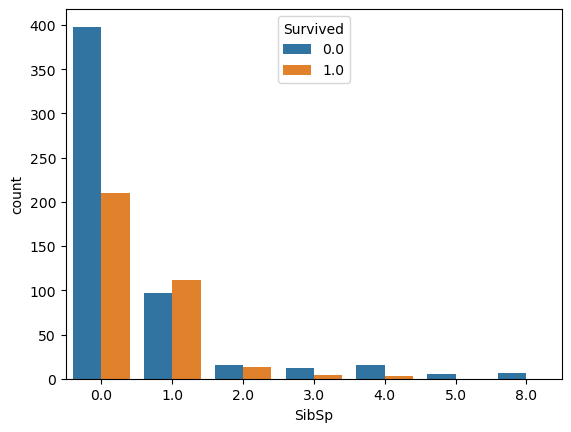

In [1612]:
sns.countplot(x='SibSp',hue='Survived',data=df1)

1. Passenger with 0 sibling or spouce has higher chances of sinking.
2. Passenger with 1 sibling or spouce has higher chances of surviving.
3. Passenger with 3,4,5 & 8 sbiling or spouce has higher chances of sinking. 

<AxesSubplot:xlabel='Parch', ylabel='count'>

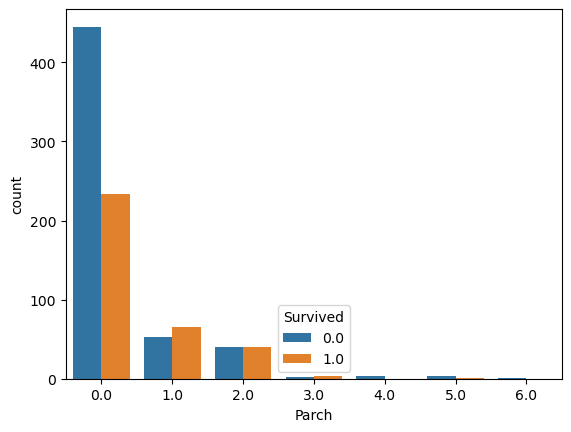

In [1613]:
sns.countplot(x='Parch',hue='Survived',data=df1)

1. Passenger with 0 parents or children has higher chances of sinking.
2. Passenger with 1 parents or children has higher chances of surviving.
3. Passenger with 3,4,5 & 6 sbiling or spouce has higher chances of sinking.

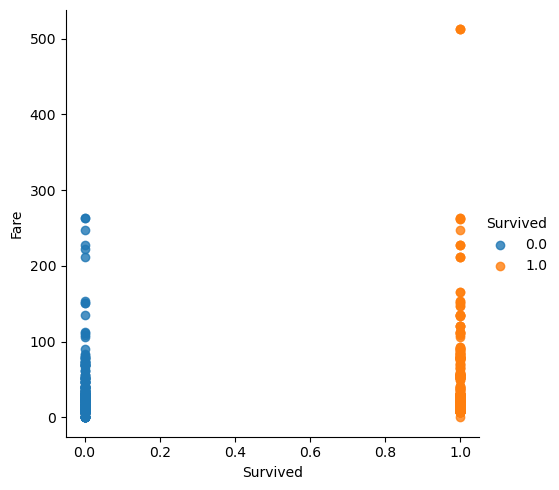

In [1614]:
sns.lmplot(x='Survived',y='Fare',hue='Survived',data=df1)

Here we can see that people with low fares has higher chances of surviving.

In [1615]:
df1

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


In [1616]:
df1.groupby('Pclass')['Age'].mean()

Pclass
1.0    37.048118
2.0    29.866958
3.0    26.403259
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

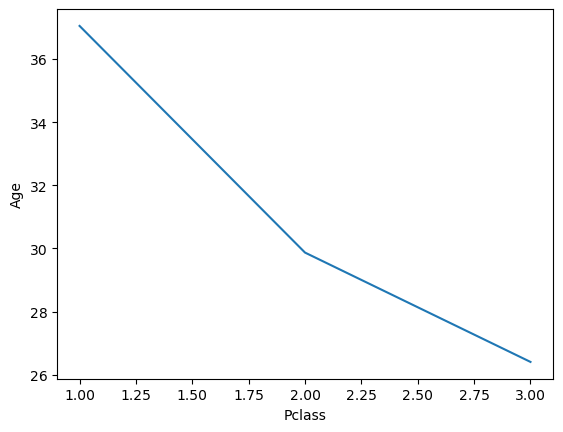

In [1617]:
plt.plot(df1.groupby('Pclass')['Age'].mean())
plt.xlabel('Pclass')
plt.ylabel('Age')

it can be seen that as we are moving down with class the age of the passenger is decreasing that is passenger in class 1 have highr age than other class passenger.

In [1618]:
df1.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex
1.0     0.0    34.141405
        1.0    39.287717
2.0     0.0    28.748661
        1.0    30.653908
3.0     0.0    24.068493
        1.0    27.372153
Name: Age, dtype: float64

it can be clearly seen that the age is decreasing with going down in the class for both the genders.

Text(0.5, 1.0, 'Descriptive graph')

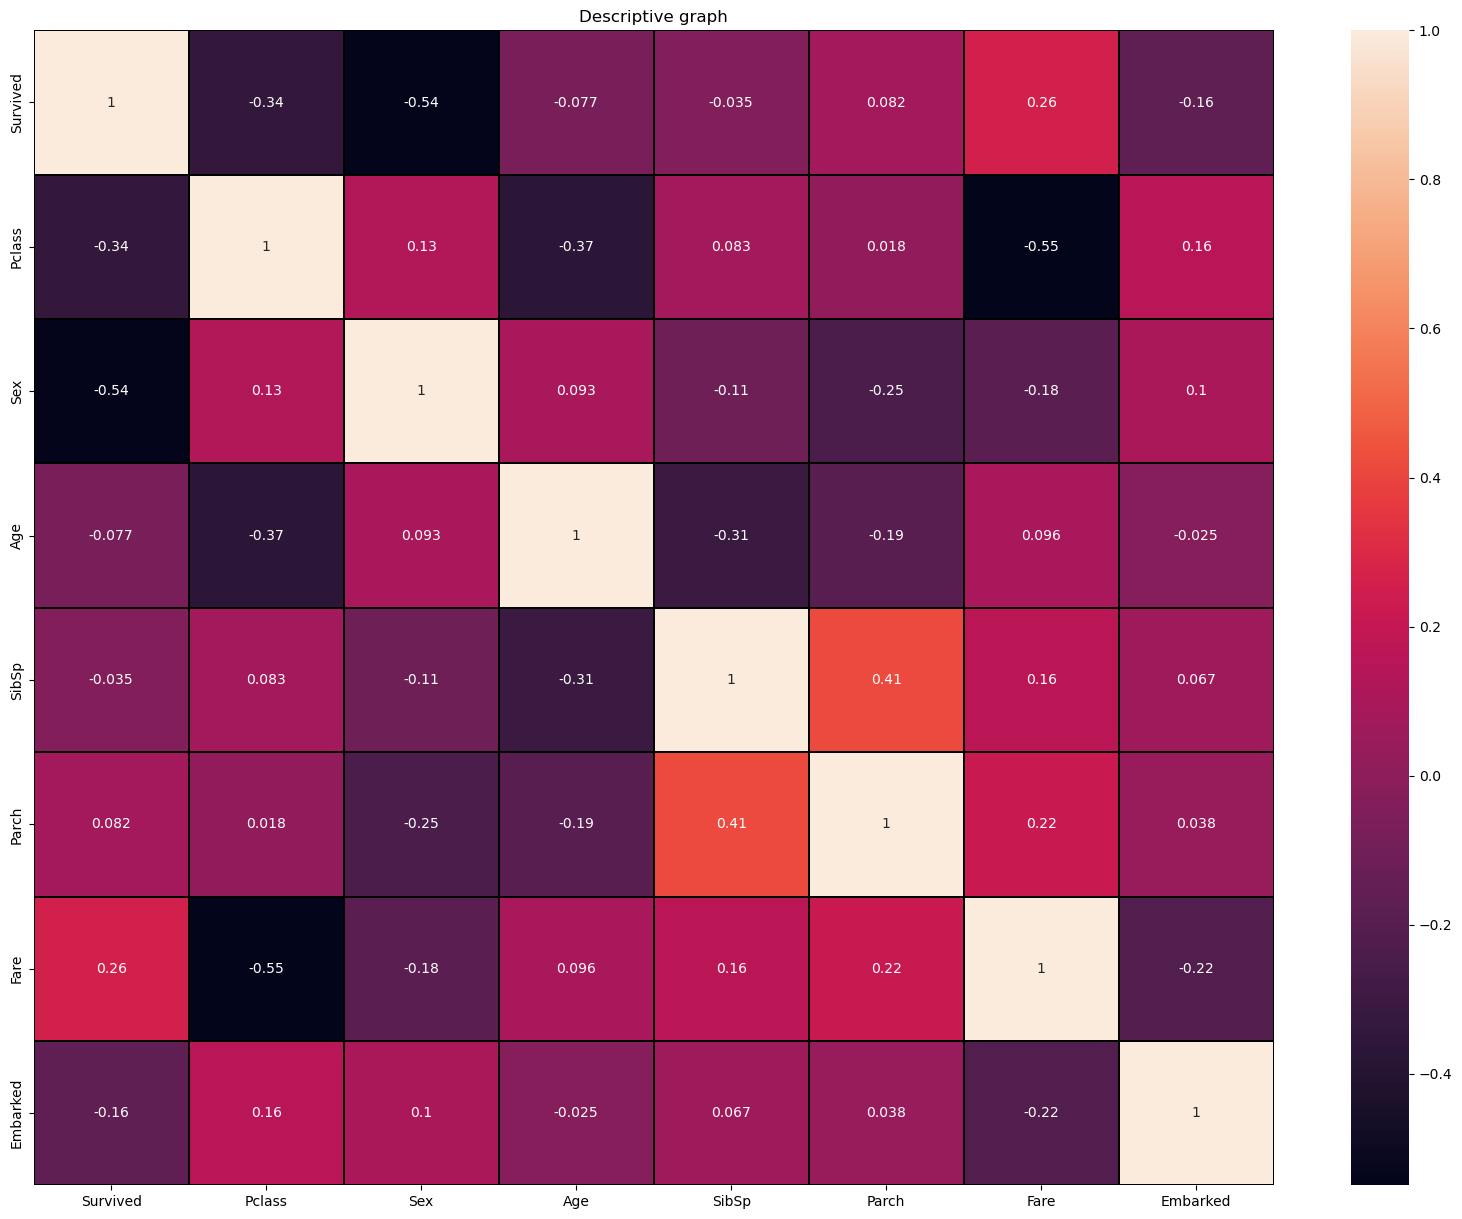

In [1619]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.3,linecolor='Black')
plt.title('Descriptive graph')

Observations-

1. Pclass & Age are 37% negetively correlated with each other.
2. Pclass & sex are 13% positively correlated with each other.
3. Sibsp & age are 31% negetively correlated with each other.
4. Parch & sex are 25% negetively correlated with each other.
5. Parch & age are 19% negetively correlated with each other.
6. Fare & Pclass 55% negetively correlated with each other.
7. Fare & sex 18% negetively correlated with each other.

In [1620]:
#Features relationship with target variable-

In [1621]:
df1.corr()

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
Age,1.000000,-0.069809,-0.331339,0.084153,-0.232625,-0.179191,0.091566,-0.022239
Survived,-0.069809,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.331339,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.157112
Sex,0.084153,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.104057
SibSp,-0.232625,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,0.066654
Parch,-0.179191,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,0.038322
Fare,0.091566,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.022239,-0.163517,0.157112,0.104057,0.066654,0.038322,-0.221226,1.000000


In [1622]:
df1.corr().Survived

Age        -0.069809
Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.163517
Name: Survived, dtype: float64

Observations-

1. Here we can see that sex is Negetively correlated to the target variable by 54%.
2. Pclass column is 33% negetively correlated with target variable.
3. Fare is 25% positively correalted with target variable.
4. Embarked is 16% negetively correlated with target variable.
5. Parch is only 8% correlated with target variable.
6. SibSb is only 3% negetively correlated with target variable.
8. Age is only 6% negetively correlated with target variable

In [1623]:
#Multivariate analysis-

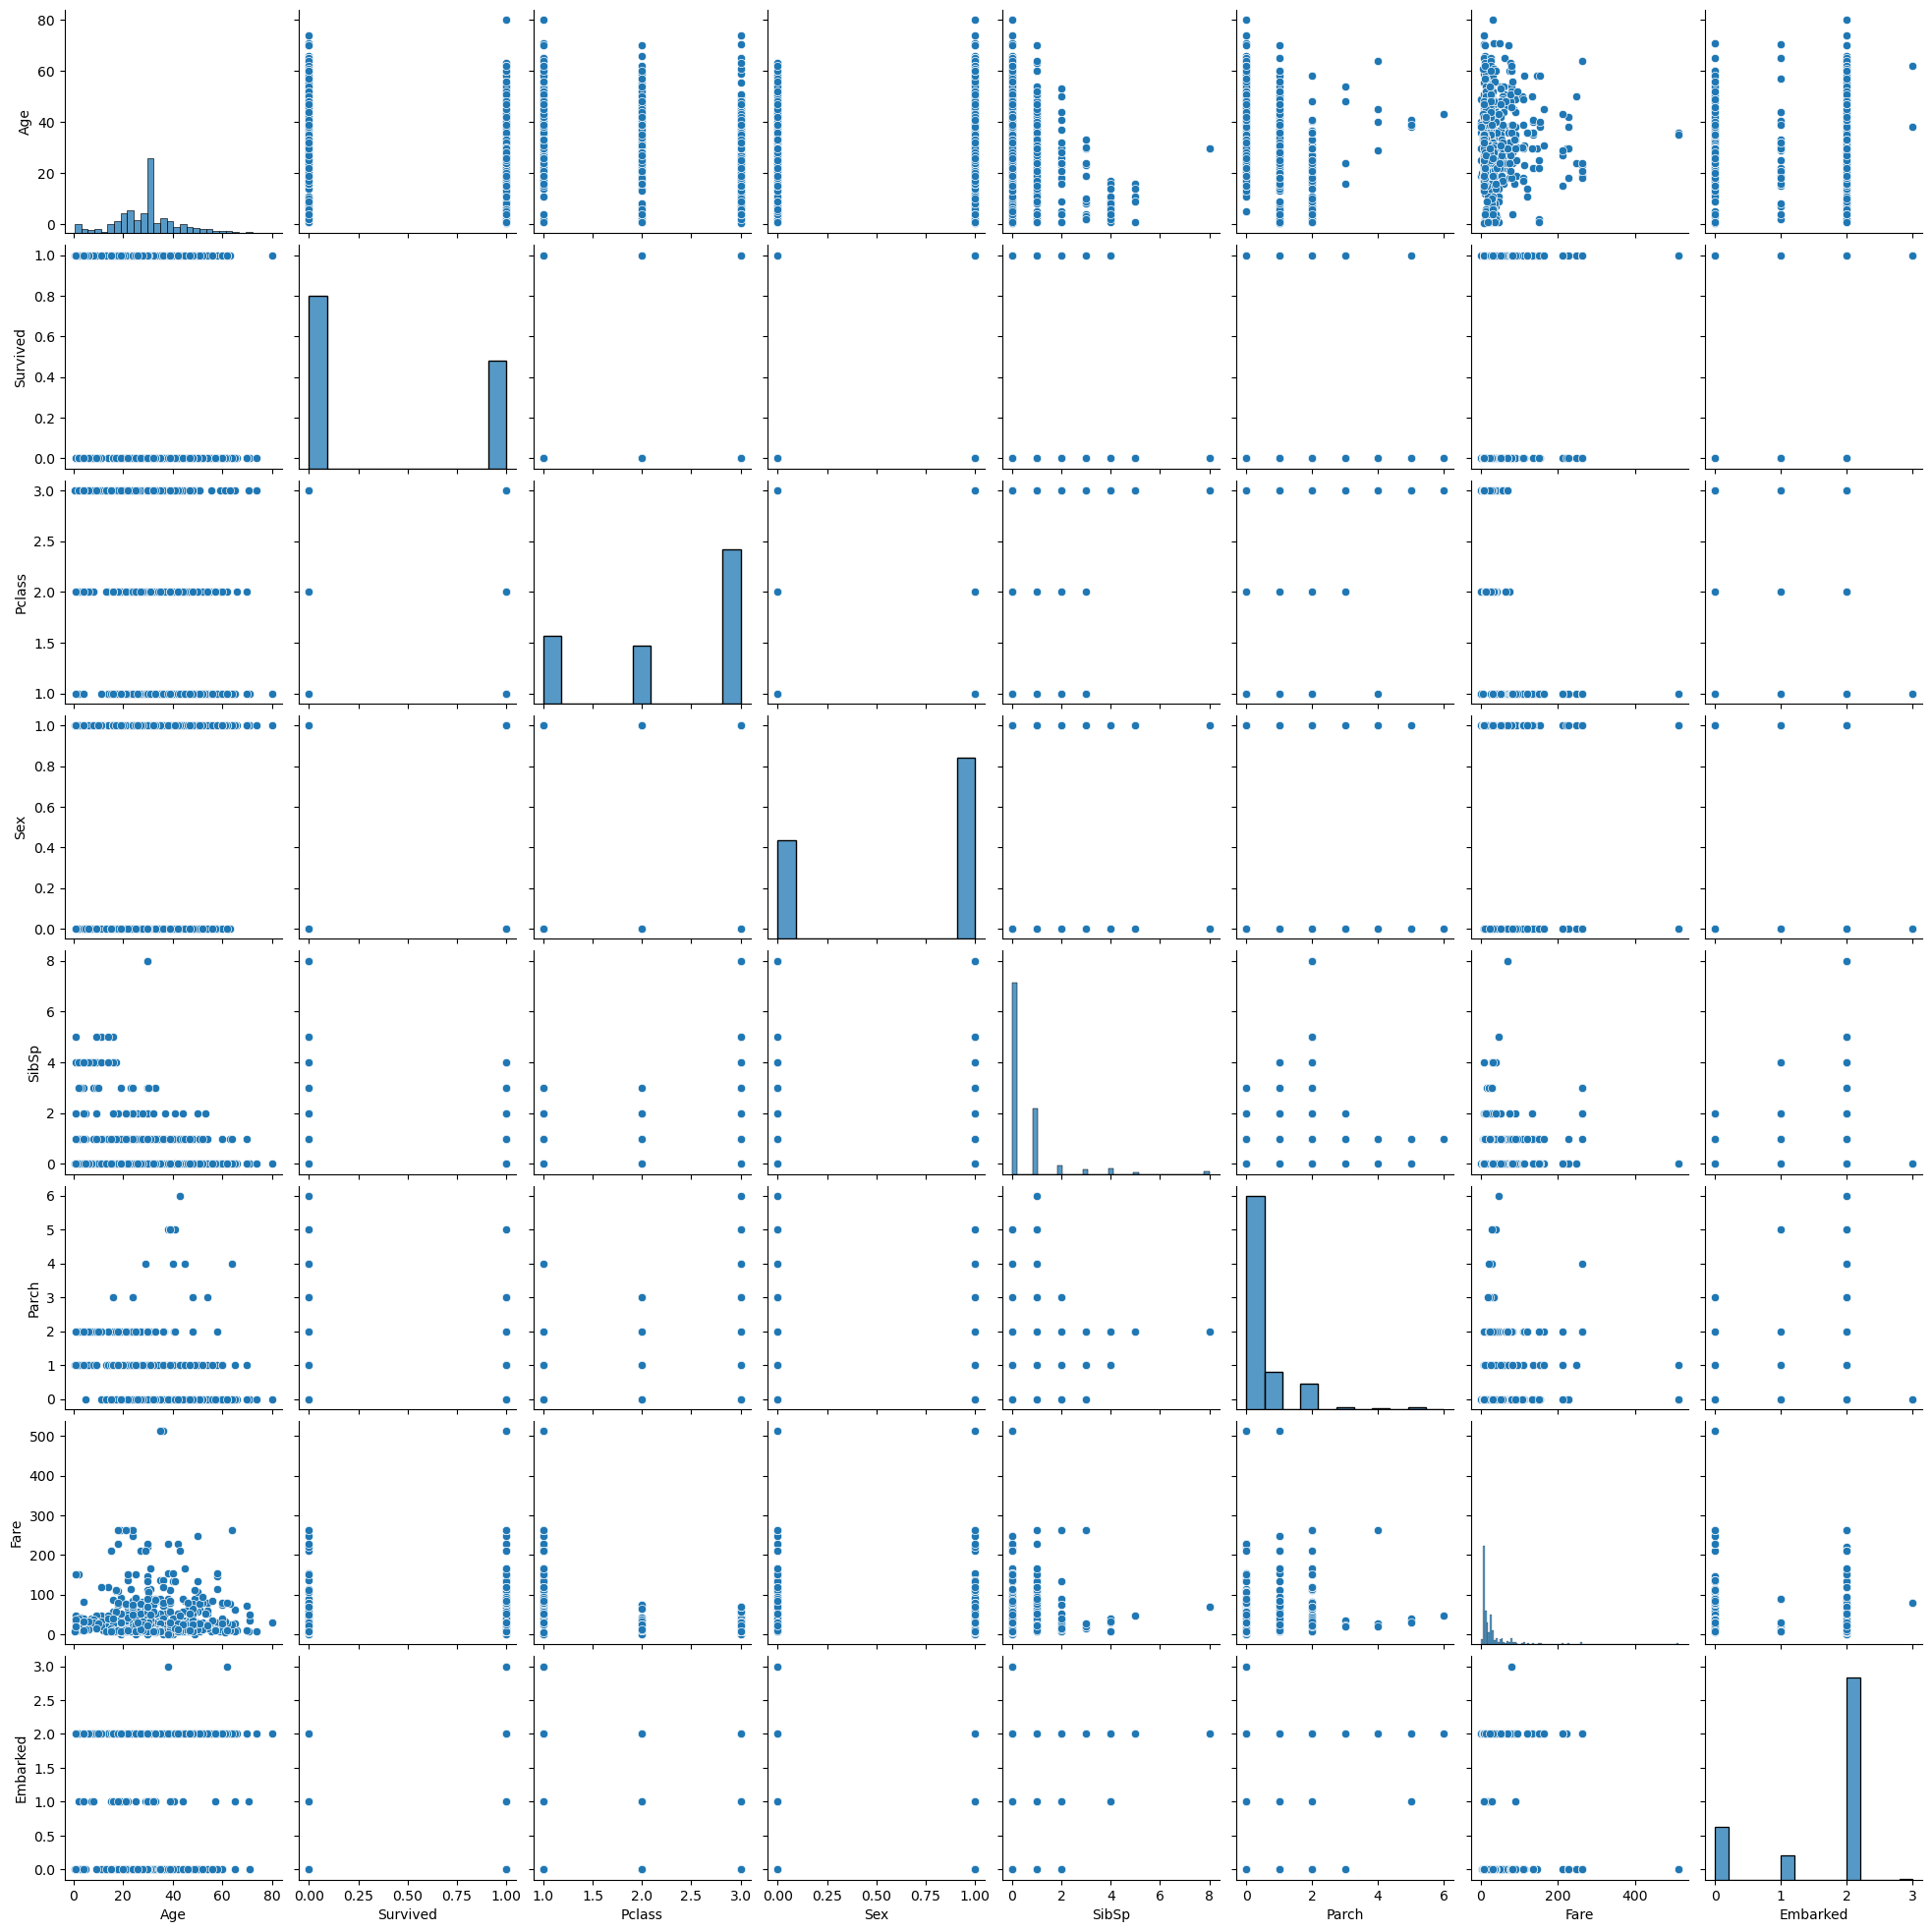

In [1624]:
sns.pairplot(df1)

Observations-

1. Passenger with higher age has high chances of sinking or not surviving.
2. Passenger in class 1 are more in age & passenger in class 3 are less in age.
3. Male passenger are higher in age.
4. Passenger with 0 sibling and spouce are more in age. Sibsp & age are inversely praportional to each other because as the no of 
Sibsp increasing age is decreasing.
6. Passenger with 0 parent&child are more in age. parch & age are inversely praportional to each other because as the no of 
parch increasing age is decreasing.
7. Age & fare do not have much correlation with each other.
8. passenger embarked from  port2 are more in age.
9. Pclass,sex & fare are mostly correlated with our target variable.
10. No correlation bw Pclass & sex.
11. Passenger embarked from port0&2 are having high fares than the passenger embarked from other ports.
12. passenger with high parch having low fares than the other passengers.
13. Sex has not much correlation with fare.

In [1625]:
x=df1.drop(columns=['Survived'],axis=1)
y=df1.Survived

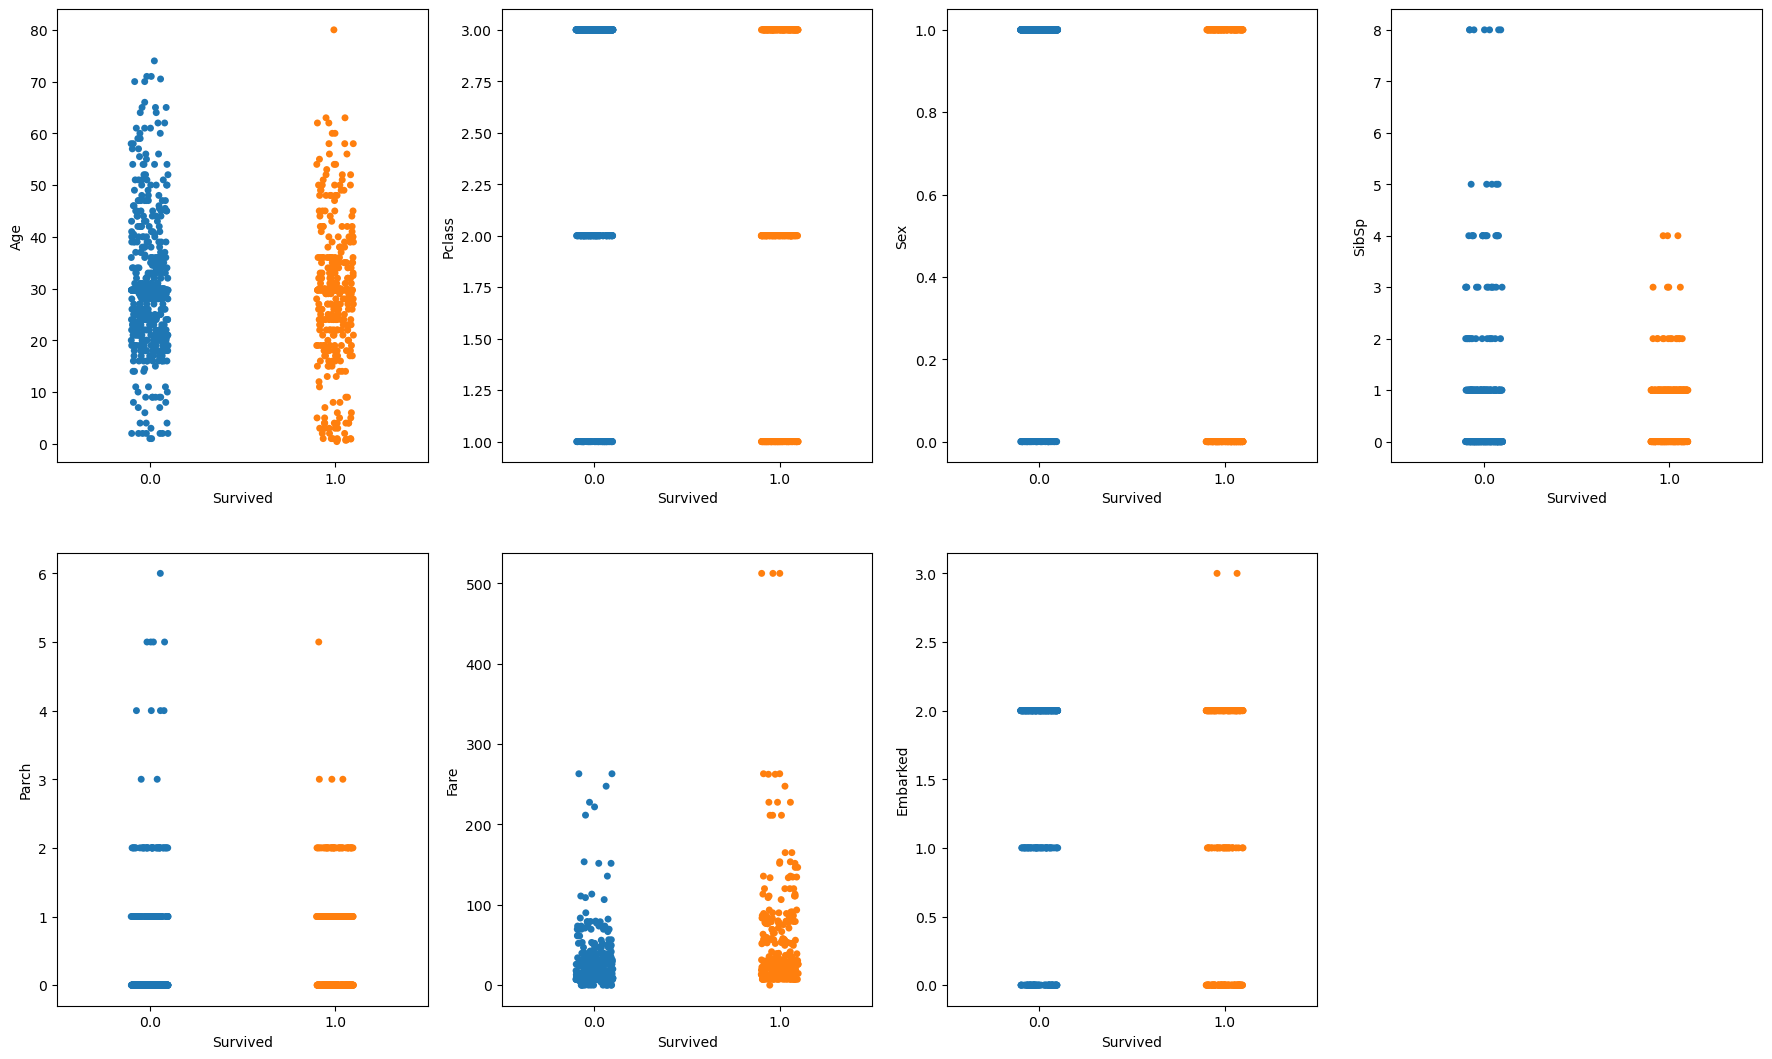

In [1626]:
plt.figure(figsize=(22,20))
plotnumber=1

for i in x:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(y,x[i])  #sns.stripplot(label,feature)
        
    plotnumber+=1
plt.show() 

Observations-

1. Passenger with lower age has high chances of survival.
2. Passenger with 1 sibsp has higher survival chances.
3. Passenger with 1 parch has higher survival chances.
4. survival chances are independent of fare charges.
5. passenger embarked from port3 all survived.

In [1627]:
#Data distribution-

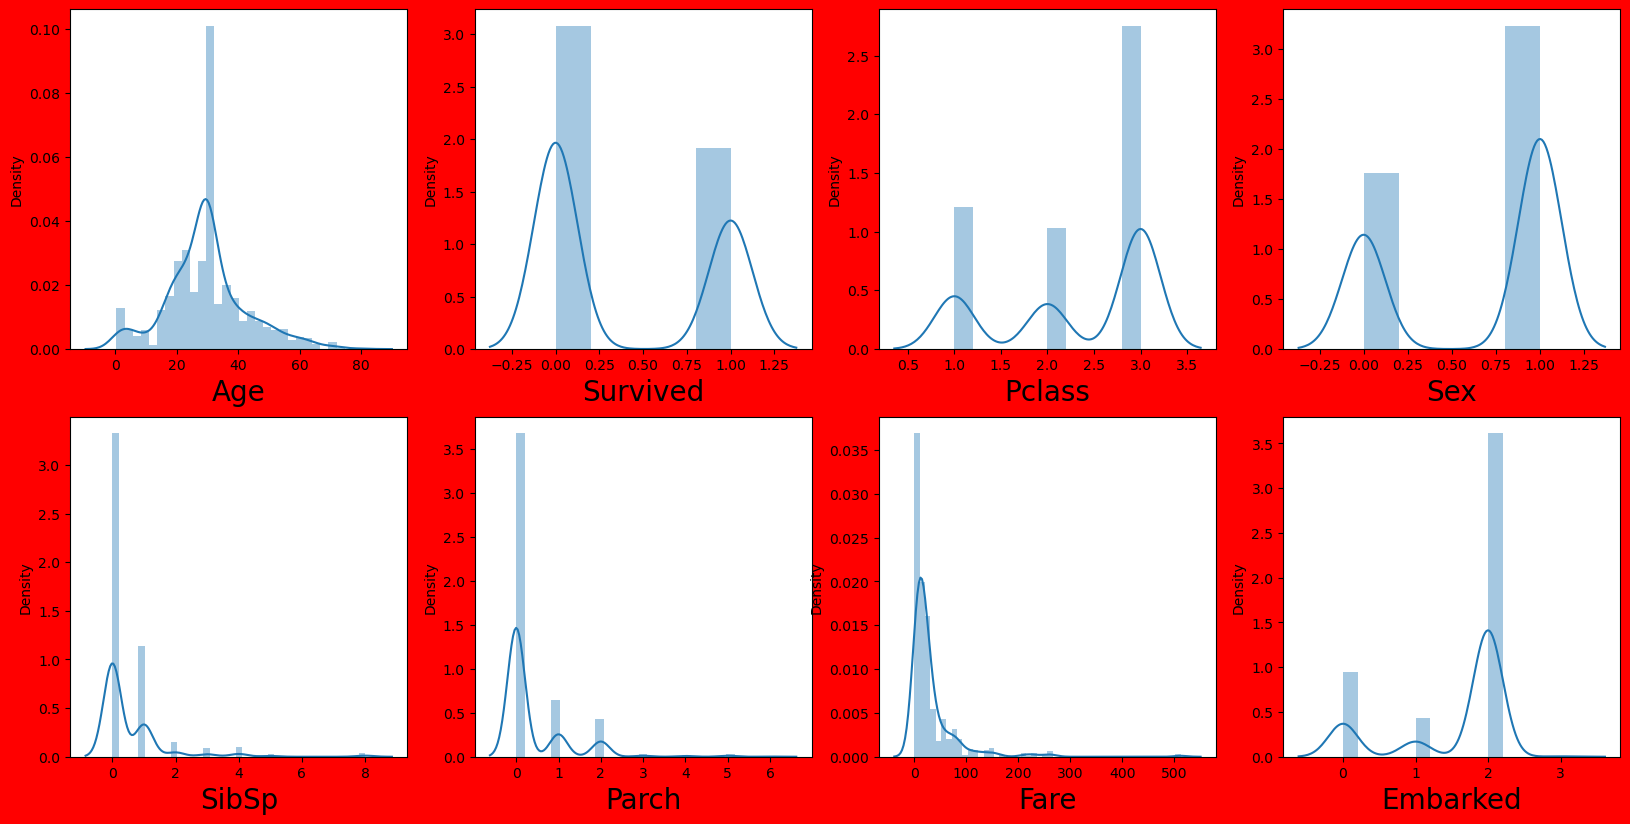

In [1628]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df1:      #we are plotting all column in one time.
    if plotnumber<=11:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

Observations- 

1. Sibsp,Parch,Fare columns having right skewed data.
2. Pclass, sex & embarked columns having left skewed data.
3. Age column looks little normal but lets check skewness through the next code for all columns.

In [1629]:
df1.skew()

Age         0.434488
Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

Here it can be seen that skewness is high in sibsp,parch,fare & embarked column.

In [1630]:
# Outliers detection-

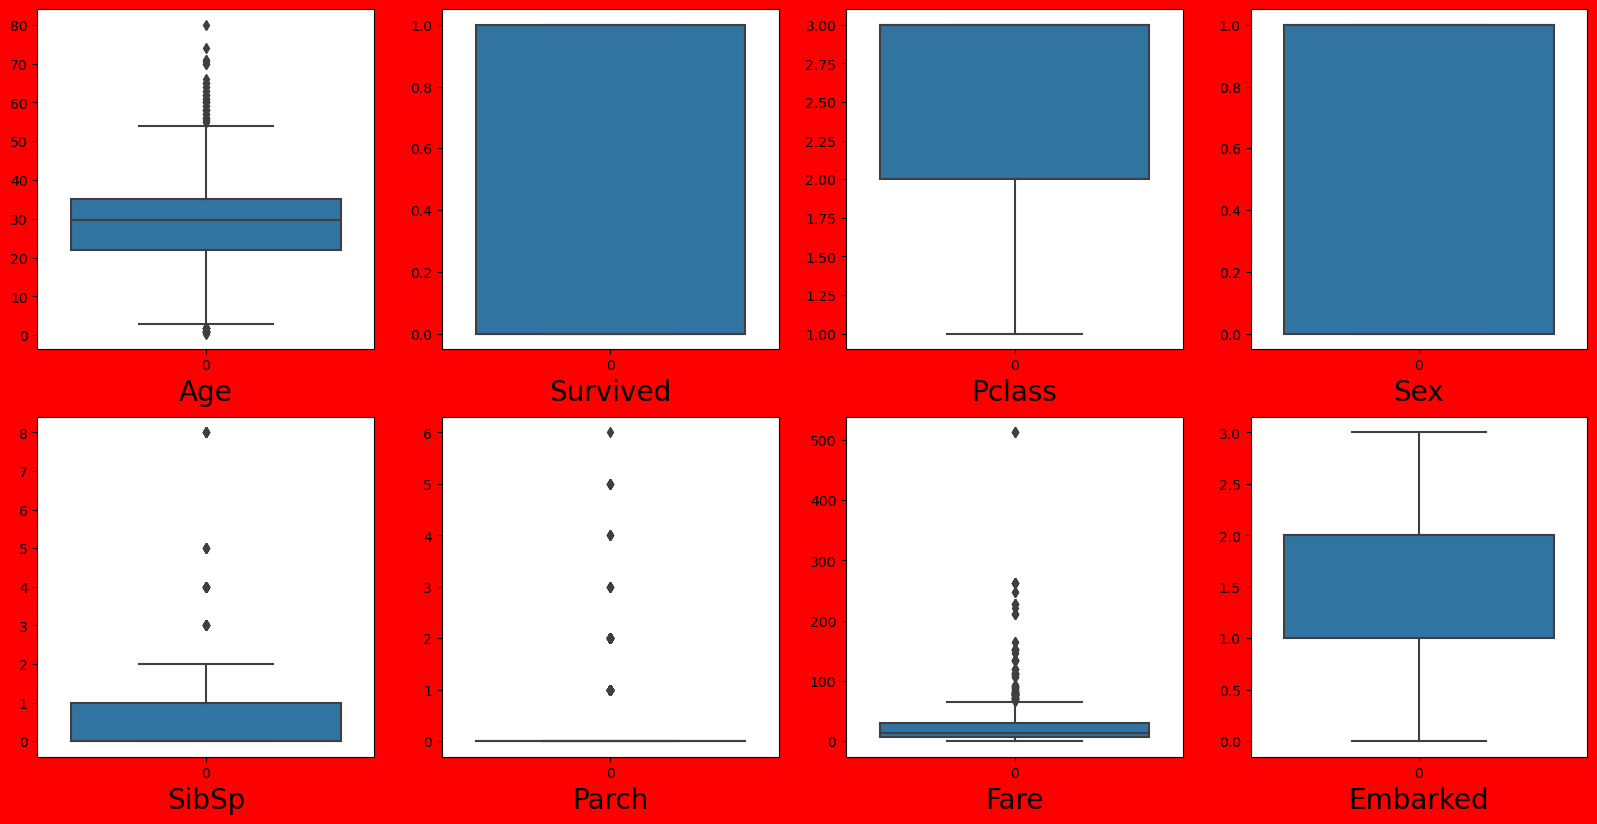

In [1631]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df1.columns:      #we are plotting all column in one time.
    if plotnumber<=11:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df1[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

Observations-

1. Outliers present in Age, Sibsp, Parch, Fare column which needs to be removed before going further in model building.

In [1632]:
#Removal of outliers by Zscore method-

In [1633]:
from scipy.stats import zscore
import numpy as np

In [1634]:
x=df1.drop(columns=['Survived'],axis=1)
y=df1.Survived

In [1635]:
z=np.abs(zscore(x))
z.shape

(891, 7)

In [1636]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 0, 0, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 0, 5, 3, 3, 5, 4,
       4, 0, 4, 0, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 0, 4, 5, 3, 3, 3, 3,
       3, 3, 0, 4, 3, 4], dtype=int64))


In [1637]:
df2=df1[(z>-3).all(axis=1)]
df3=df2[(z<3).all(axis=1)]
print(df1.shape)
print(df3.shape)

(891, 8)
(820, 8)


In [1638]:
data_loss=((df1.shape[0]-df3.shape[0])/df1.shape[0])*100
data_loss

7.968574635241302

Data loss is in acceptable range

In [1639]:
df3

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


In [1640]:
#Skewness removal-

In [1641]:
df3.skew()

Age         0.318314
Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

here it can be seen that sibsp,parch,fare,embarked has skewness, but sibsp,parch,embarked are categorical columns so we will not remove skewness from these columns.

In [1642]:
df3['Fare']=np.cbrt(df3['Fare'])

In [1643]:
df3.skew()

Age         0.318314
Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
SibSp       1.979577
Parch       2.122629
Fare        0.708623
Embarked   -1.257511
dtype: float64

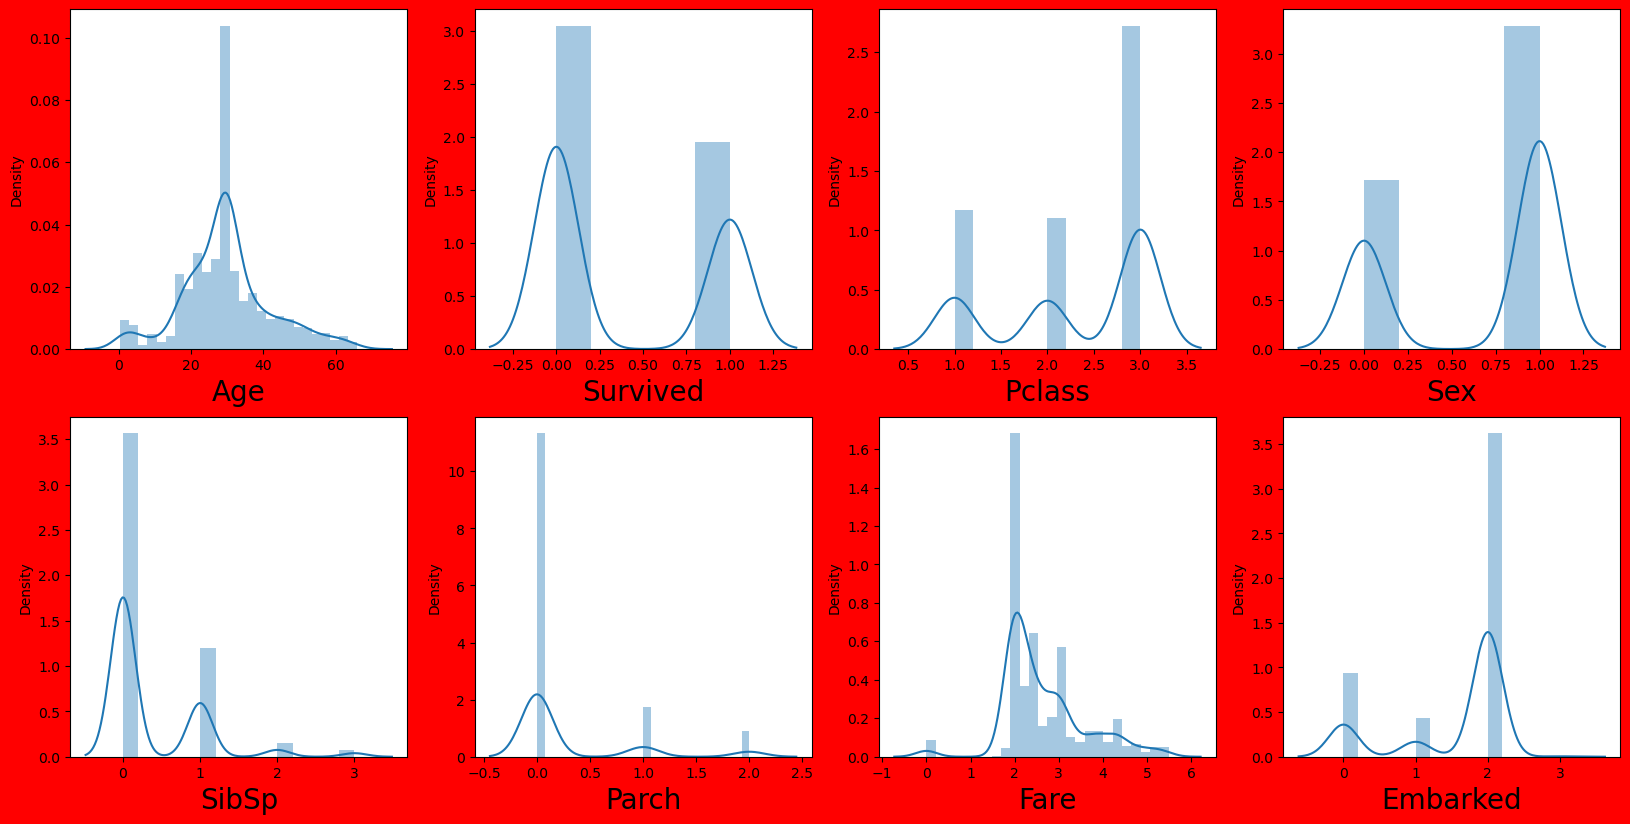

In [1644]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df3.columns:      #we are plotting all column in one time.
    if plotnumber<=11:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.distplot(df3[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [1645]:
df3.corr().Survived

Age        -0.090926
Survived    1.000000
Pclass     -0.322306
Sex        -0.554888
SibSp       0.094459
Parch       0.201071
Fare        0.363961
Embarked   -0.150562
Name: Survived, dtype: float64

In [1646]:
x=df3.drop(columns=['Survived'],axis=1)
y=df3.Survived

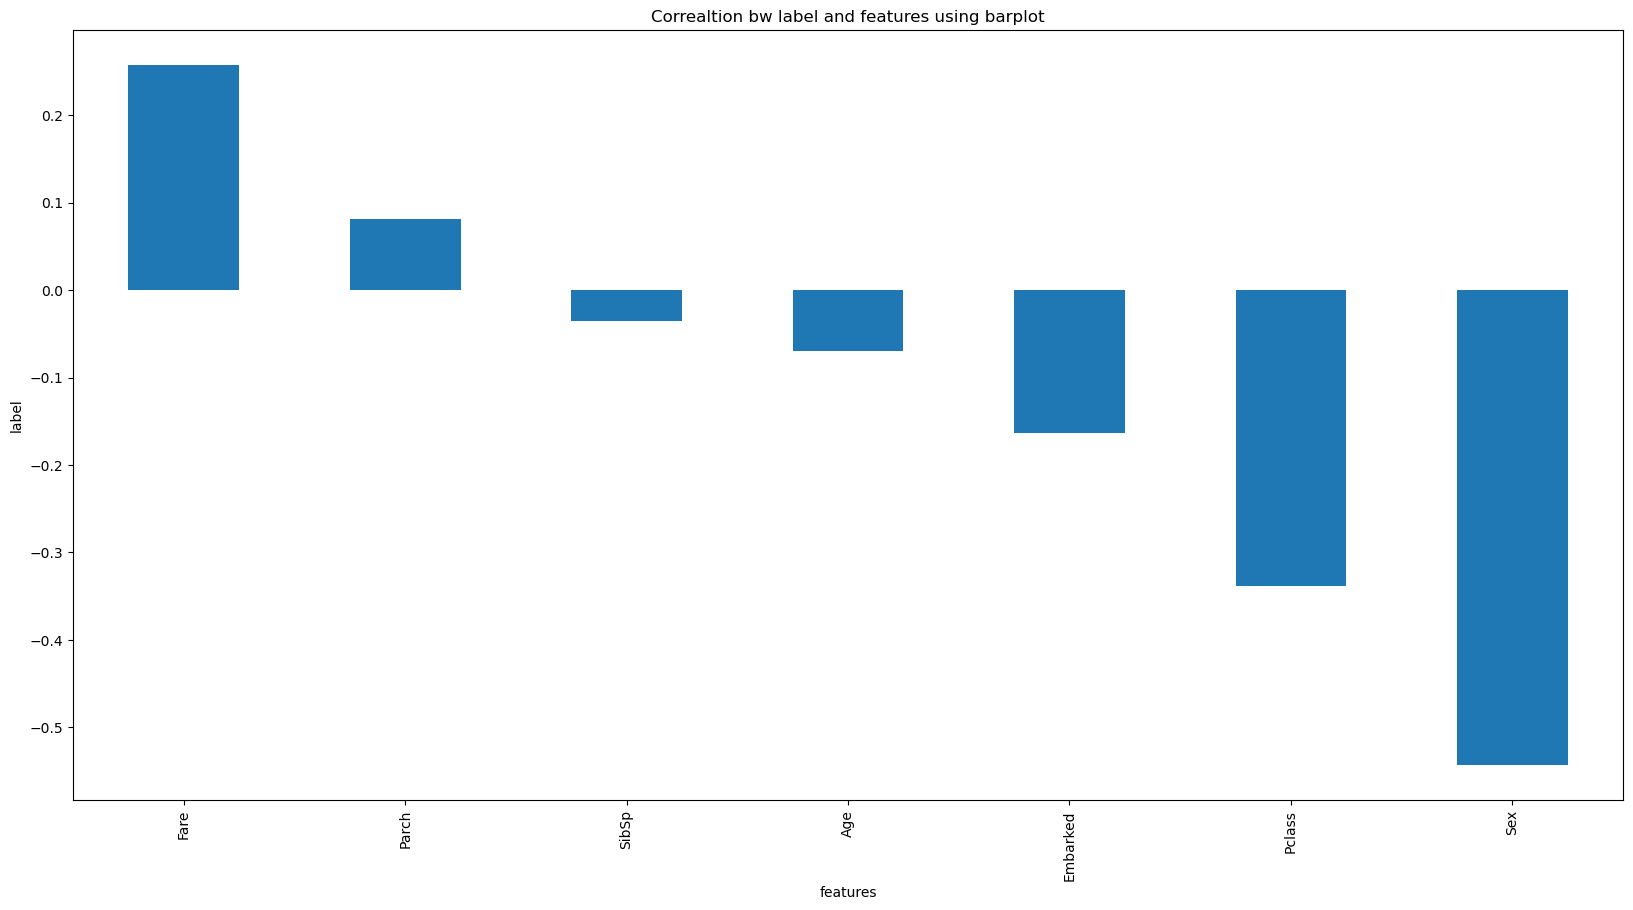

In [1647]:
plt.figure(figsize=(20,10))
df1.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

Here we can say that Sibsp & Age has very less relationship with the target variable. i will make two models, one with keeping 
all the featutres & one with dropping drpping age & Sibsp.

In [1648]:
# Feature scaling- 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,-0.641702,0.833995,0.722036,1.051956,-0.451141,-0.766275,0.577898
1,0.675821,-1.586804,-1.384973,1.051956,-0.451141,1.623850,-1.949444
2,-0.312321,0.833995,-1.384973,-0.563407,-0.451141,-0.703257,0.577898
3,0.428785,-1.586804,-1.384973,1.051956,-0.451141,1.204749,0.577898
4,0.428785,0.833995,0.722036,-0.563407,-0.451141,-0.691984,0.577898
...,...,...,...,...,...,...,...
815,-0.229976,-0.376405,0.722036,-0.563407,-0.451141,-0.316660,0.577898
816,-0.888737,-1.586804,-1.384973,-0.563407,-0.451141,0.500522,0.577898
817,-0.007717,0.833995,-1.384973,1.051956,3.088912,0.235725,0.577898
818,-0.312321,-1.586804,0.722036,-0.563407,-0.451141,0.500522,-1.949444


In [1649]:
#checking for multicollinearity-

In [1650]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.251856,Age
1,2.288226,Pclass
2,1.137482,Sex
3,1.258854,SibSp
4,1.299343,Parch
5,2.604239,Fare
6,1.048897,Embarked


Here it can be seen that there is no multicollinearity among features.

In [1651]:
#Model building with all features-

In [1652]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [1653]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8536585365853658 at random state 43


In [1654]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=maxrs)

In [1655]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

Here i have just defined a function to call it again.

In [1656]:
#logistic regression-

In [1657]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [1658]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 77.89%
/n=====================Test Result=====================
accuracy_score: 82.93%
confusion matrix is: 
[[108  19]
 [ 16  62]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       127
         1.0       0.77      0.79      0.78        78

    accuracy                           0.83       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.83      0.83      0.83       205



Here with logisctic regression i got 78% train accuracy & 83% test accuracy.

In [1659]:
# Random forest-

In [1660]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [1661]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 98.21%
/n=====================Test Result=====================
accuracy_score: 84.88%
confusion matrix is: 
[[112  15]
 [ 16  62]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       127
         1.0       0.81      0.79      0.80        78

    accuracy                           0.85       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.85      0.85      0.85       205



With random forest i got 98% train result & 85% test result.

In [1662]:
#SupportVectorMachineClassifier-

In [1663]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [1664]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 82.44%
/n=====================Test Result=====================
accuracy_score: 85.37%
confusion matrix is: 
[[111  16]
 [ 14  64]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       127
         1.0       0.80      0.82      0.81        78

    accuracy                           0.85       205
   macro avg       0.84      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



With support vector machine i got 82% train accuracy & 85% test accuracy.

In [1665]:
#GradientBoostingClassifier-

In [1666]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [1667]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 90.57%
/n=====================Test Result=====================
accuracy_score: 86.83%
confusion matrix is: 
[[114  13]
 [ 14  64]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       127
         1.0       0.83      0.82      0.83        78

    accuracy                           0.87       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.87      0.87      0.87       205



with gradient boosting classifier i got 90.5% train accuracy & 87% test accuracy.

In [1668]:
#AdaBoostClassifier-

In [1669]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [1670]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 82.11%
/n=====================Test Result=====================
accuracy_score: 81.46%
confusion matrix is: 
[[103  24]
 [ 14  64]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       127
         1.0       0.73      0.82      0.77        78

    accuracy                           0.81       205
   macro avg       0.80      0.82      0.81       205
weighted avg       0.82      0.81      0.82       205



with adaboosting classifier i got 82 train accuracy & 81.4% test accuracy.

In [1671]:
#BaggingClassifier-

In [1674]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [1675]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 96.42%
/n=====================Test Result=====================
accuracy_score: 86.34%
confusion matrix is: 
[[116  11]
 [ 17  61]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       127
         1.0       0.85      0.78      0.81        78

    accuracy                           0.86       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.86      0.86       205



With bagging classifier i am getting 95% train result and 86% test accuracy.

In [1676]:
#ExtraTreeClassifier-

In [1679]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [1680]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 98.21%
/n=====================Test Result=====================
accuracy_score: 82.93%
confusion matrix is: 
[[108  19]
 [ 16  62]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       127
         1.0       0.77      0.79      0.78        78

    accuracy                           0.83       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.83      0.83      0.83       205



with ExtraTreesClassifier i am getting 98% train accuracy & 83% test accuracy which looks like there is some overfitting in the model performace.

In [1681]:
from sklearn.tree import DecisionTreeClassifier

In [1682]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [1683]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 98.21%
/n=====================Test Result=====================
accuracy_score: 80.00%
confusion matrix is: 
[[103  24]
 [ 17  61]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       127
         1.0       0.72      0.78      0.75        78

    accuracy                           0.80       205
   macro avg       0.79      0.80      0.79       205
weighted avg       0.80      0.80      0.80       205



with DecisionTreeClassifier i am getting 98% train accuracy & 80% test accuracy which looks like there is some overfitting in the model performace.

In [1684]:
#Cross validation-

In [1685]:
from sklearn.model_selection import cross_val_score

In [1686]:
def score(clf,x,y):
    score1=cross_val_score(clf,x,y)
    print(score1)
    print('cross validation score is:-',score1.mean())

In [1687]:
#logistic regression-

In [1688]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [1689]:
score(clf,x,y)

[0.79268293 0.78658537 0.76829268 0.79268293 0.79878049]
cross validation score is:- 0.7878048780487805


In [1690]:
# Random forest-

In [1691]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [1692]:
score(clf,x,y)

[0.79268293 0.81707317 0.87195122 0.77439024 0.83536585]
cross validation score is:- 0.8182926829268293


In [1693]:
#SupportVectorMachineClassifier-

In [1694]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [1695]:
score(svc,x,y)

[0.84146341 0.79878049 0.79878049 0.80487805 0.84756098]
cross validation score is:- 0.8182926829268293


In [1696]:
#GradientBoostingClassifier-

In [1697]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [1698]:
score(clf,x,y)

[0.77439024 0.82317073 0.82317073 0.79268293 0.81097561]
cross validation score is:- 0.804878048780488


In [1699]:
#AdaBoostClassifier-

In [1700]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [1701]:
score(clf,x,y)

[0.75609756 0.79268293 0.79268293 0.78658537 0.83536585]
cross validation score is:- 0.7926829268292683


In [1702]:
#BaggingClassifier-

In [1703]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [1704]:
score(clf,x,y)

[0.74390244 0.79878049 0.84756098 0.76219512 0.82317073]
cross validation score is:- 0.7951219512195122


In [1705]:
#ExtraTreeClassifier-

In [1706]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [1707]:
score(clf,x,y)

[0.75       0.76829268 0.82926829 0.7804878  0.7804878 ]
cross validation score is:- 0.7817073170731706


In [1708]:
#DecisionTreeClassifier

In [1709]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [1710]:
score(clf,x,y)

[0.68902439 0.76219512 0.80487805 0.73780488 0.7804878 ]
cross validation score is:- 0.7548780487804878


Here i am selecting gradient boosting classifier as my best model as it is giving around 87% acccuracy which i will perform hyperparameter tunning.

In [1713]:
#Hyperparameter tunning-

In [1714]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [1715]:
gb=GradientBoostingClassifier()

In [1716]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1717]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss' : ['deviance', 'exponential'],'n_estimators':[50,100],'learning_rate' :[0.01,0.1],'min_samples_split' :[3,4,5,6],'random_state':[100,1000,200],'min_samples_split':[2,3,4,5],'max_depth':[4,5,6],'max_features' : ['auto', 'sqrt']}

In [637]:
grid_search=GridSearchCV(estimator=gb,param_grid=param_grid,cv=5)

In [638]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100],
                         'random_state': [100, 1000, 200]})

In [639]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 50,
 'random_state': 200}

In [1718]:
clf=GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.1,
 loss= 'exponential',
 max_depth= 6,
 max_features= 'sqrt',
 min_samples_split= 8,
 n_estimators= 8,
 random_state= 4)

In [1719]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', max_depth=6, max_features='sqrt',
                           min_samples_split=8, n_estimators=8, random_state=4)

In [1720]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 85.53%
/n=====================Test Result=====================
accuracy_score: 89.27%
confusion matrix is: 
[[122   5]
 [ 17  61]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       127
         1.0       0.92      0.78      0.85        78

    accuracy                           0.89       205
   macro avg       0.90      0.87      0.88       205
weighted avg       0.90      0.89      0.89       205



here we have improved the model accuracy after playing around with these parameters the final model accuracy is around 90%

In [1724]:
#Saving model-1

In [1725]:
import joblib
joblib.dump(clf,'Titanic_survived_1')

['Titanic_survived_1']

In [1726]:
#Load the model-

In [1727]:
model=joblib.load('Titanic_survived_1')

In [1728]:
prediction=model.predict(x_test)
prediction

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1.])

In [1729]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
200,1.0,1.0
201,0.0,0.0
202,0.0,0.0
203,0.0,0.0


In [1730]:
#AUC ROC curve-

In [1731]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

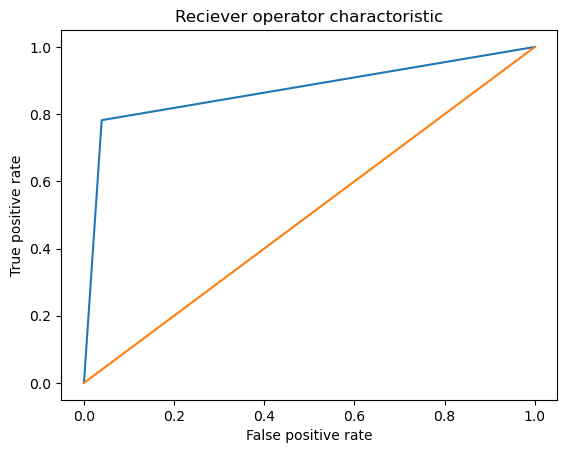

0.8713406016555622


In [1732]:
fpr,tpr,threshold=roc_curve(y_test,model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,clf.predict(x_test))
print(auc_score)

Here we can see my final model after hyperparameter tunning, the auc score for the model is aprox 87% which is quiet good.

In [1733]:
#Model No-2 Building with using feature selection method-

In [1768]:
df1

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


In [1769]:
x=df1.drop(columns=['Survived'])
y=df1.Survived

In [1770]:
#Feature selection-

In [1771]:
from sklearn.feature_selection import SelectKBest,f_classif  

In [1772]:
best_features=SelectKBest(score_func=f_classif,k=4) 
                                                     

fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(x.columns)  



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(4,'score')) 

        score feature_name
2  372.405724          Sex
1  115.031272       Pclass
5   63.030764         Fare
6   24.422821     Embarked


from the K best feature selection method we got age,sibsp has not much good score so we will not take them moving further.

In [1773]:
df=df1[['Sex','Pclass','Fare','Embarked','Survived']]
df

,Sex,Pclass,Fare,Embarked,Survived
0,1.0,3.0,7.2500,2.0,0.0
1,0.0,1.0,71.2833,0.0,1.0
2,0.0,3.0,7.9250,2.0,1.0
3,0.0,1.0,53.1000,2.0,1.0
4,1.0,3.0,8.0500,2.0,0.0
...,...,...,...,...,...
886,1.0,2.0,13.0000,2.0,0.0
887,0.0,1.0,30.0000,2.0,1.0
888,0.0,3.0,23.4500,2.0,0.0
889,1.0,1.0,30.0000,0.0,1.0


In [1774]:
df.skew()

Sex        -0.618921
Pclass     -0.630548
Fare        4.787317
Embarked   -1.246689
Survived    0.478523
dtype: float64

In [1775]:
#skewness removal-

In [1776]:
#Separating x & y and checking for outliers-

In [1777]:
x=df.drop(columns=['Survived'],axis=1)
y=df.Survived

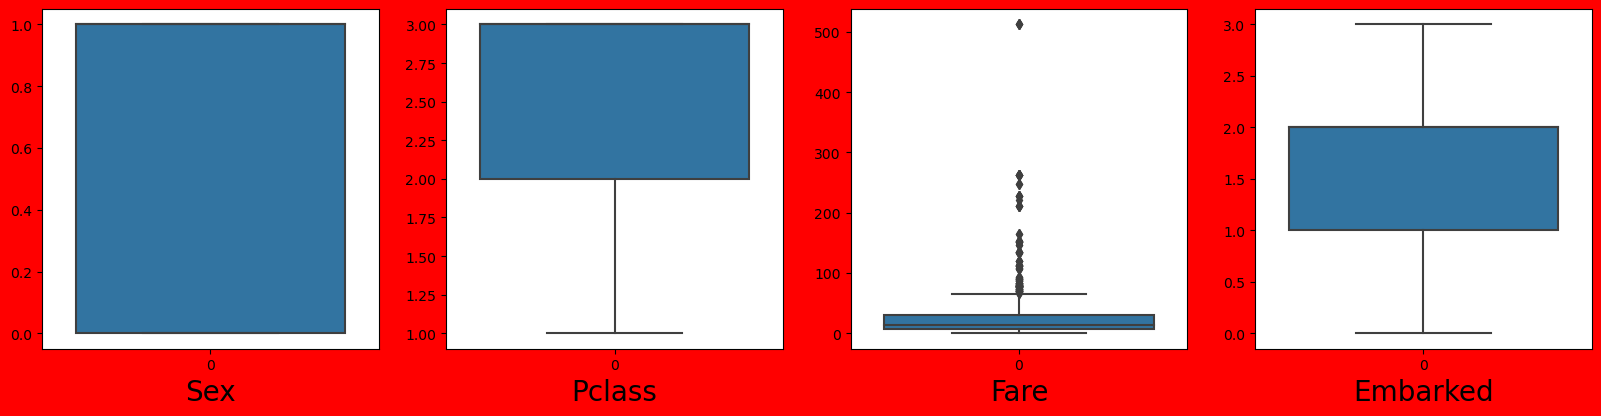

In [1778]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=7:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

Fare column has outliers

In [1779]:
from scipy.stats import zscore
import numpy as np

In [1780]:
x=df.drop(columns=['Survived'],axis=1)
y=df.Survived

In [1781]:
z=np.abs(zscore(x))
z.shape

(891, 4)

In [1782]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(891, 5)
(871, 5)


In [1783]:
df1

,Sex,Pclass,Fare,Embarked,Survived
0,1.0,3.0,7.2500,2.0,0.0
1,0.0,1.0,71.2833,0.0,1.0
2,0.0,3.0,7.9250,2.0,1.0
3,0.0,1.0,53.1000,2.0,1.0
4,1.0,3.0,8.0500,2.0,0.0
...,...,...,...,...,...
886,1.0,2.0,13.0000,2.0,0.0
887,0.0,1.0,30.0000,2.0,1.0
888,0.0,3.0,23.4500,2.0,0.0
889,1.0,1.0,30.0000,0.0,1.0


In [1784]:
df1.skew()

Sex        -0.645209
Pclass     -0.696979
Fare        2.250999
Embarked   -1.301465
Survived    0.510329
dtype: float64

In [1785]:
df1['Fare']=np.sqrt(df1['Fare'])

In [1786]:
df1.skew()

Sex        -0.645209
Pclass     -0.696979
Fare        1.245196
Embarked   -1.301465
Survived    0.510329
dtype: float64

now the skewness in control in all continous data columns.

In [1787]:
x=df1.drop(columns=['Survived'],axis=1)
y=df1.Survived

In [1788]:
#Feature scaling-

In [1789]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Sex,Pclass,Fare,Embarked
0,0.728530,0.805494,-0.804943,0.569029
1,-1.372627,-1.630567,1.642640,-1.992337
2,-1.372627,0.805494,-0.752778,0.569029
3,-1.372627,-1.630567,1.150614,0.569029
4,0.728530,0.805494,-0.743366,0.569029
...,...,...,...,...
866,0.728530,-0.412536,-0.416347,0.569029
867,-1.372627,-1.630567,0.380312,0.569029
868,-1.372627,0.805494,0.110156,0.569029
869,0.728530,-1.630567,0.380312,-1.992337


In [1790]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8587786259541985 at random state 150


In [1791]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [1792]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [1793]:
#Logistic Regression-

In [1800]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [1801]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 77.03%
/n=====================Test Result=====================
accuracy_score: 80.28%
confusion matrix is: 
[[115  21]
 [ 22  60]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       136
         1.0       0.74      0.73      0.74        82

    accuracy                           0.80       218
   macro avg       0.79      0.79      0.79       218
weighted avg       0.80      0.80      0.80       218



with logistic regression i got 80% test accuracy.

In [1802]:
#Random forest-

In [1803]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [1804]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 90.20%
/n=====================Test Result=====================
accuracy_score: 88.07%
confusion matrix is: 
[[127   9]
 [ 17  65]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       136
         1.0       0.88      0.79      0.83        82

    accuracy                           0.88       218
   macro avg       0.88      0.86      0.87       218
weighted avg       0.88      0.88      0.88       218



with random forest i got 88% test accuracy.

In [1805]:
#Support vector classifier-

In [1806]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [1807]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 90.20%
/n=====================Test Result=====================
accuracy_score: 88.07%
confusion matrix is: 
[[127   9]
 [ 17  65]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       136
         1.0       0.88      0.79      0.83        82

    accuracy                           0.88       218
   macro avg       0.88      0.86      0.87       218
weighted avg       0.88      0.88      0.88       218



with SVC i got 88% test accuracy.

In [1808]:
#GradientBoostingClassifier

In [1809]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [1810]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 86.68%
/n=====================Test Result=====================
accuracy_score: 86.24%
confusion matrix is: 
[[129   7]
 [ 23  59]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       136
         1.0       0.89      0.72      0.80        82

    accuracy                           0.86       218
   macro avg       0.87      0.83      0.85       218
weighted avg       0.87      0.86      0.86       218



with Gradient boosting Classifier i got 86.2% test accuracy.

In [1811]:
#AdaBoostClassifier

In [1812]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [1813]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 80.40%
/n=====================Test Result=====================
accuracy_score: 82.11%
confusion matrix is: 
[[118  18]
 [ 21  61]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       136
         1.0       0.77      0.74      0.76        82

    accuracy                           0.82       218
   macro avg       0.81      0.81      0.81       218
weighted avg       0.82      0.82      0.82       218



with ada boosting Classifier i got 82.1% test accuracy.

In [1814]:
#Bagging classifier

In [1815]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [1816]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 89.28%
/n=====================Test Result=====================
accuracy_score: 84.40%
confusion matrix is: 
[[119  17]
 [ 17  65]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       136
         1.0       0.79      0.79      0.79        82

    accuracy                           0.84       218
   macro avg       0.83      0.83      0.83       218
weighted avg       0.84      0.84      0.84       218



with ada bagging Classifier i got 85% test accuracy.

In [1817]:
#ExtraTreesClassifier-

In [1818]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [1819]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 90.20%
/n=====================Test Result=====================
accuracy_score: 87.61%
confusion matrix is: 
[[127   9]
 [ 18  64]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       136
         1.0       0.88      0.78      0.83        82

    accuracy                           0.88       218
   macro avg       0.88      0.86      0.86       218
weighted avg       0.88      0.88      0.87       218



with extra trees Classifier i got 88% test accuracy.

In [1820]:
#DecisionTreeClassifier-

In [1821]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [1822]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 90.20%
/n=====================Test Result=====================
accuracy_score: 87.16%
confusion matrix is: 
[[125  11]
 [ 17  65]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       136
         1.0       0.86      0.79      0.82        82

    accuracy                           0.87       218
   macro avg       0.87      0.86      0.86       218
weighted avg       0.87      0.87      0.87       218



with decision tree classifier i got 87% accuracy.

In [1823]:
#Cross validation score-

In [1824]:
#Logistic regression-

In [1825]:
def score(clf,x,y):
    score1=cross_val_score(clf,x,y)
    print(score1)
    print('cross validation score is:-',score1.mean())

In [1826]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [1827]:
score(clf,x,y)

[0.76571429 0.79310345 0.75287356 0.77011494 0.7816092 ]
cross validation score is:- 0.7726830870279146


The cross validation score for logistic regression is 77.2%.

In [1828]:
#Random forest-

In [1829]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [1830]:
score(clf,x,y)

[0.73714286 0.7816092  0.82758621 0.81034483 0.81609195]
cross validation score is:- 0.7945550082101805


The cross validation score for Random forest is 79.4%.

In [1831]:
#Support vector classifier-

In [1832]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [1833]:
score(clf,x,y)

[0.74285714 0.7816092  0.83333333 0.8045977  0.82183908]
cross validation score is:- 0.7968472906403942


The cross validation score for support vector classifier is 79.7%.

In [1834]:
#Gradient boosting classifier-

In [1835]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [1836]:
score(clf,x,y)

[0.77714286 0.8045977  0.84482759 0.78735632 0.79310345]
cross validation score is:- 0.8014055829228244


The cross validation score for Gradient boosting classifier is 80%.

In [1837]:
#Adaboostclassifier-

In [1838]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [1839]:
score(clf,x,y)

[0.77142857 0.79310345 0.78735632 0.81609195 0.75287356]
cross validation score is:- 0.7841707717569787


The cross validation score for Adaboost classifier is 78.4%.

In [1840]:
#Baggingclassifier-

In [1841]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [1842]:
score(clf,x,y)

[0.73142857 0.79310345 0.83333333 0.79310345 0.81034483]
cross validation score is:- 0.7922627257799671


The cross validation score for Bagging classifier is 79.2%.

In [1843]:
#Extratreeclassifier-

In [1844]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [1845]:
score(clf,x,y)

[0.76       0.78735632 0.83908046 0.81034483 0.81609195]
cross validation score is:- 0.8025747126436782


The cross validation score for Extratreesclassifier is 80%.

In [1846]:
#Decisiontreeclassifier-

In [1847]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [1848]:
score(clf,x,y)

[0.78285714 0.79885057 0.84482759 0.81609195 0.82758621]
cross validation score is:- 0.8140426929392447


The cross validation score for logistic regression is 81%.

i am selecting GradientBoostingClassifier as my best model which is giving me almost 86% accuracy & cross validation score is also 80% on which i will perform hyperparameter tunning.

In [1849]:
#Hyperparameter tunning-

In [1850]:
gb=GradientBoostingClassifier()

In [1851]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1852]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss' : ['deviance', 'exponential'],'n_estimators':[50,100],'learning_rate' :[0.01,0.1],'min_samples_split' :[3,4,5,6],'random_state':[100,1000,200],'min_samples_split':[2,3,4,5],'max_depth':[4,5,6],'max_features' : ['auto', 'sqrt']}

In [1853]:
grid_search=GridSearchCV(estimator=gb,param_grid=param_grid,cv=5)

In [1218]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100],
                         'random_state': [100, 1000, 200]})

In [1219]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 200}

In [1869]:
clf=GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.1,
 loss= 'exponential',
 max_depth= 33,
 max_features= 'sqrt',
 min_samples_split= 5,
 n_estimators= 7,
 random_state= 7)

In [1870]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', max_depth=33,
                           max_features='sqrt', min_samples_split=5,
                           n_estimators=7, random_state=7)

In [1871]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 90.05%
/n=====================Test Result=====================
accuracy_score: 87.61%
confusion matrix is: 
[[127   9]
 [ 18  64]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       136
         1.0       0.88      0.78      0.83        82

    accuracy                           0.88       218
   macro avg       0.88      0.86      0.86       218
weighted avg       0.88      0.88      0.87       218



so final accuracy of my model is 88%.

In [1877]:
#Saving my model-2

In [1885]:
import joblib
joblib.dump(clf,'Titanic_survived_2')

['Titanic_survived_2']

In [1886]:
#Loading the model-2

In [1887]:
model_2=joblib.load('Titanic_survived_2')

In [1888]:
prediction=model.predict(x_test)
prediction

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1889]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
213,0.0,0.0
214,0.0,0.0
215,0.0,0.0
216,0.0,0.0


this is my models final prediction

In [1890]:
#AUC ROC curve-

In [1891]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

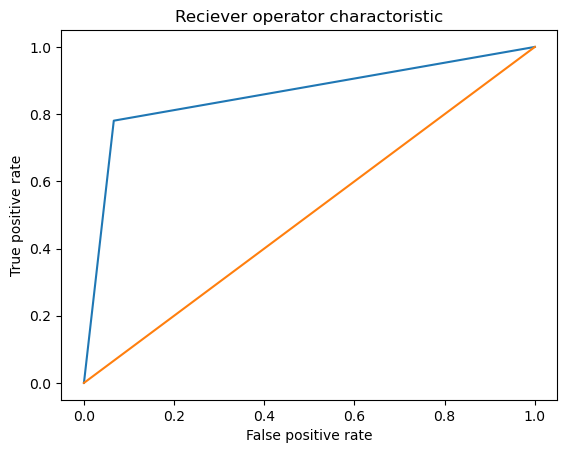

0.8571556671449068


In [1892]:
fpr,tpr,threshold=roc_curve(y_test,model_2.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,clf.predict(x_test))
print(auc_score)

The AUC Score is 86%. which means my model is 86% able to understand or distinguish between classes.

In [1893]:
#Model-3(Model by dropping Both age & fare column)

In [1933]:
df1

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,38.000000,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,26.000000,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,35.000000,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,35.000000,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,27.000000,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,19.000000,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,29.699118,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,26.000000,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


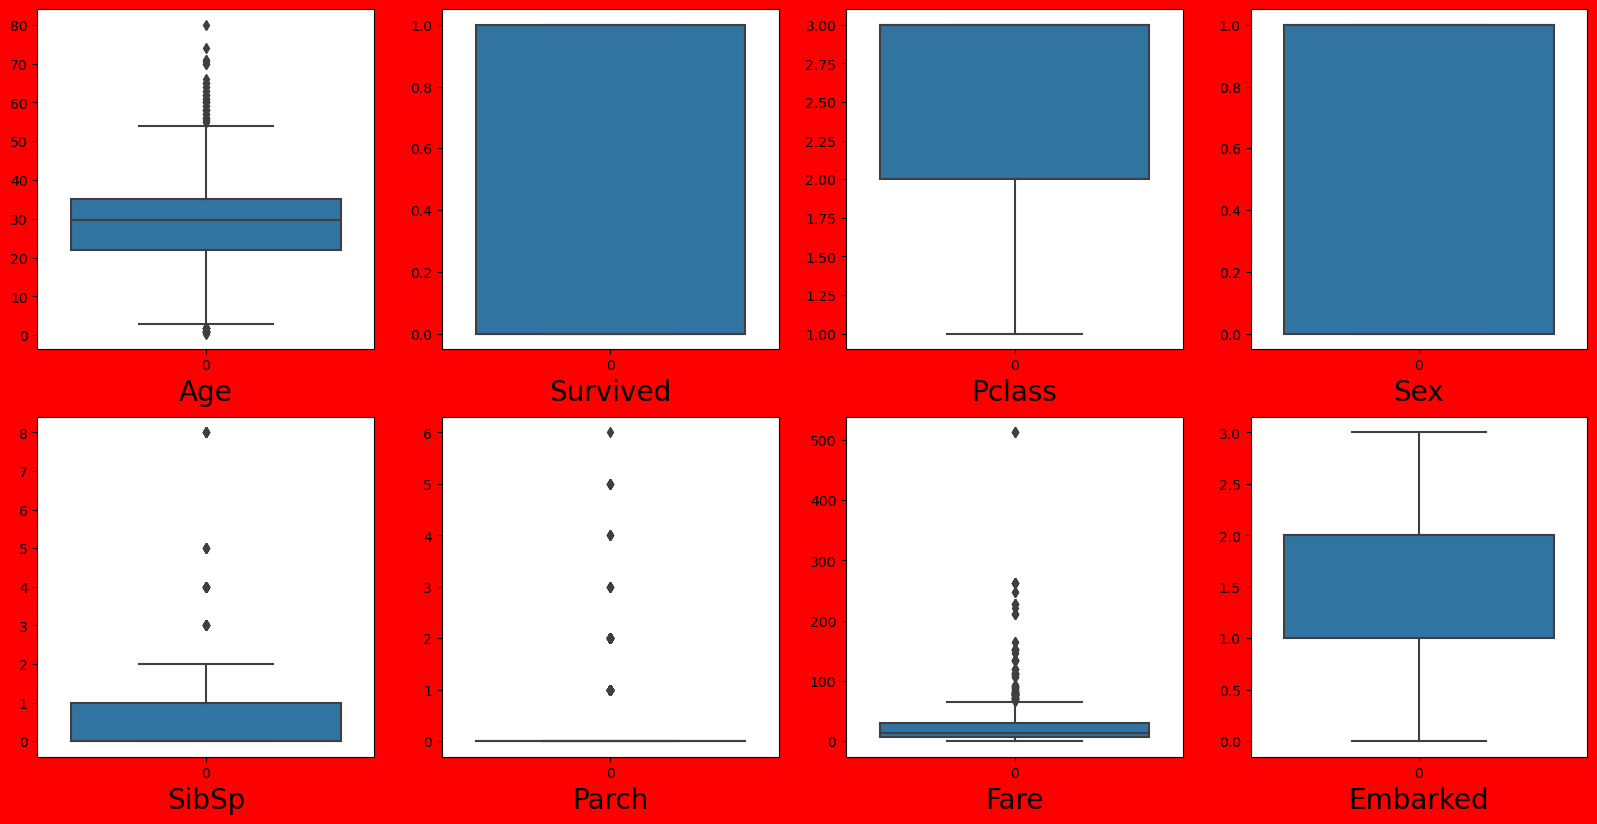

In [1934]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df1.columns:      #we are plotting all column in one time.
    if plotnumber<=11:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df1[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [1935]:
df1.corr().Survived

Age        -0.069809
Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.163517
Name: Survived, dtype: float64

here i will be dropping age & fare column as both the column have very high qty of outliers.parch & sibsp are categorical column so we are not concerned about the outliers in these columns.

In [1936]:
df1=df1.drop(columns=['Age','Fare'])
df1

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0.0,3.0,1.0,1.0,0.0,2.0
1,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,0.0,0.0,0.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2.0
4,0.0,3.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,2.0
887,1.0,1.0,0.0,0.0,0.0,2.0
888,0.0,3.0,0.0,1.0,2.0,2.0
889,1.0,1.0,1.0,0.0,0.0,0.0


In [1937]:
df1.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
SibSp       3.695352
Parch       2.749117
Embarked   -1.246689
dtype: float64

All are categorical columns so i am not concerned about skewness in the data of these columns.

In [1938]:
x=df1.drop(columns=['Survived'])
y=df1.Survived

In [1939]:
# Feature scaling- 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,SibSp,Parch,Embarked
0,0.827377,0.737695,0.432793,-0.473674,0.581114
1,-1.566107,-1.355574,0.432793,-0.473674,-1.938460
2,0.827377,-1.355574,-0.474545,-0.473674,0.581114
3,-1.566107,-1.355574,0.432793,-0.473674,0.581114
4,0.827377,0.737695,-0.474545,-0.473674,0.581114
...,...,...,...,...,...
886,-0.369365,0.737695,-0.474545,-0.473674,0.581114
887,-1.566107,-1.355574,-0.474545,-0.473674,0.581114
888,0.827377,-1.355574,0.432793,2.008933,0.581114
889,-1.566107,0.737695,-0.474545,-0.473674,-1.938460


In [1940]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [1941]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8283582089552238 at random state 45


In [1942]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=maxrs)

In [1943]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [1944]:
#logistic regression-

In [1945]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [1946]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 78.59%
/n=====================Test Result=====================
accuracy_score: 82.06%
confusion matrix is: 
[[123  22]
 [ 18  60]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       145
         1.0       0.73      0.77      0.75        78

    accuracy                           0.82       223
   macro avg       0.80      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



the test accuracy for logistic regression is 82%

In [1947]:
# Random forest-

In [1948]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [1949]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 82.93%
/n=====================Test Result=====================
accuracy_score: 82.96%
confusion matrix is: 
[[126  19]
 [ 19  59]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       145
         1.0       0.76      0.76      0.76        78

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



the test accuracy for Random forest is 83%

In [1950]:
#SupportVectorMachineClassifier-

In [1951]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [1952]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 80.24%
/n=====================Test Result=====================
accuracy_score: 84.30%
confusion matrix is: 
[[128  17]
 [ 18  60]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       145
         1.0       0.78      0.77      0.77        78

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



for support vector classifier method i am getting 80% my test accuracy and almost 84% the train accuracy which is very good.

In [1953]:
#GradientBoostingClassifier-

In [1954]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [1955]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 81.44%
/n=====================Test Result=====================
accuracy_score: 82.96%
confusion matrix is: 
[[128  17]
 [ 21  57]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       145
         1.0       0.77      0.73      0.75        78

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



for Gradient boosting classifier method i am getting 82% my train accuracy and almost 83% the test accuracy which is good

In [1352]:
#AdaBoostClassifier-

In [1353]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [1354]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 79.64%
/n=====================Test Result=====================
accuracy_score: 80.72%
confusion matrix is: 
[[126  19]
 [ 24  54]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       145
         1.0       0.74      0.69      0.72        78

    accuracy                           0.81       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.81      0.81       223



for ada boost classifier method i am getting 80% my train accuracy and almost 81% the test accuracy which is good

In [1956]:
#BaggingClassifier-

In [1957]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [1958]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 82.63%
/n=====================Test Result=====================
accuracy_score: 83.41%
confusion matrix is: 
[[127  18]
 [ 19  59]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       145
         1.0       0.77      0.76      0.76        78

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



for bagging classifier method i am getting 83% my train accuracy and almost 83% the test accuracy which is good

In [1959]:
#ExtraTreeClassifier-

In [1960]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [1961]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 82.93%
/n=====================Test Result=====================
accuracy_score: 83.41%
confusion matrix is: 
[[128  17]
 [ 20  58]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       145
         1.0       0.77      0.74      0.76        78

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



for extra tree classifier method i am getting 83% my train accuracy and almost 83% the test accuracy which is good

In [1962]:
from sklearn.tree import DecisionTreeClassifier

In [1963]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [1964]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 82.93%
/n=====================Test Result=====================
accuracy_score: 83.86%
confusion matrix is: 
[[129  16]
 [ 20  58]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       145
         1.0       0.78      0.74      0.76        78

    accuracy                           0.84       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



for decision tree classifier i am getting 83% train accuracy but 84% 

In [1965]:
#Cross validation-

In [1966]:
from sklearn.model_selection import cross_val_score

In [1967]:
#logistic regression-

In [1968]:
def score(clf,x,y):
    score1=cross_val_score(clf,x,y)
    print(score1)
    print('cross validation score is:-',score1.mean())

In [1969]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [1970]:
score(clf,x,y)

[0.77653631 0.79775281 0.78089888 0.76404494 0.80337079]
cross validation score is:- 0.7845207457158998


The cross validation score for logistic regression is 78.4%

In [1971]:
# Random forest-

In [1972]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [1973]:
score(clf,x,y)

[0.74860335 0.79213483 0.82022472 0.78089888 0.80898876]
cross validation score is:- 0.7901701085933087


The cross validation score for logistic regression is 79%

In [1974]:
#SupportVectorMachineClassifier-

In [1975]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [1976]:
score(svc,x,y)

[0.79888268 0.80337079 0.80898876 0.78651685 0.8258427 ]
cross validation score is:- 0.8047203565375682


The cross validation score for SVC is 80.4%

In [1977]:
#GradientBoostingClassifier-

In [1978]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [1979]:
score(clf,x,y)

[0.76536313 0.78651685 0.80898876 0.76966292 0.83146067]
cross validation score is:- 0.7923984683949532


The cross validation score for gradient boosting classifier is 79.3%

In [1980]:
#AdaBoostClassifier-

In [1981]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [1982]:
score(clf,x,y)

[0.75977654 0.79213483 0.80337079 0.79213483 0.79775281]
cross validation score is:- 0.789033958947963


The cross validation score for ada boosting classifier is 79%

In [1983]:
#BaggingClassifier-

In [1986]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [1987]:
score(clf,x,y)

[0.75418994 0.78089888 0.8258427  0.75280899 0.82022472]
cross validation score is:- 0.786793045006591


The cross validation score for bagging classifier is 78.6%

In [1988]:
#ExtraTreeClassifier-

In [1989]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [1990]:
score(clf,x,y)

[0.7877095  0.80898876 0.80898876 0.7752809  0.80898876]
cross validation score is:- 0.797991337643588


The cross validation score for extra tree classifier is 79.7%

In [1991]:
#DecisionTreeClassifier

In [1992]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [1993]:
score(clf,x,y)

[0.78212291 0.80337079 0.80898876 0.7752809  0.79775281]
cross validation score is:- 0.7935032326909798


Here i am selecting decision tree as my best model for hyperparameter tunning-

In [1994]:
#Hyperparameter tunning-

In [1995]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [1996]:
dt=DecisionTreeClassifier()

In [1997]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [1998]:
param_grid={'criterion':['gini', 'entropy'],'ccp_alpha':[.001,.1],'min_samples_split' :[3,4,5,6],'random_state':[100,1000,200],'min_samples_split':[2,3,4,5],'max_depth':[4,5,6],'max_features' : ['auto', 'sqrt'],'min_samples_leaf':[4,5,6,7], 'max_leaf_nodes':[3,4,5,6,7]}

In [1999]:
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)

In [1450]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5],
                         'random_state': [100, 1000, 200]})

In [1451]:
best_parameters=grid_search.best_params_
best_parameters

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'random_state': 200}

In [2000]:
clf=DecisionTreeClassifier(criterion= 'entropy',ccp_alpha=0.0001,
 max_depth= 11,
 max_features= 'auto',
 min_samples_split= 5,
 max_leaf_nodes= 70,            
min_samples_leaf= 5,
 random_state= 4)

In [2001]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=11,
                       max_features='auto', max_leaf_nodes=70,
                       min_samples_leaf=5, min_samples_split=5, random_state=4)

In [2002]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 80.39%
/n=====================Test Result=====================
accuracy_score: 82.51%
confusion matrix is: 
[[129  16]
 [ 23  55]]


 Test classification report
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       145
         1.0       0.77      0.71      0.74        78

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



so even after hypertunning the model still i am getting 82.5% accuracy.

In [2003]:
#Saving model No-3

In [2004]:
import joblib
joblib.dump(clf,'Titanic_survived_3')

['Titanic_survived_3']

In [2005]:
#Loading the model-

In [2006]:
model_3=joblib.load('Titanic_survived_3')

In [2007]:
prediction=model_3.predict(x_test)
prediction

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0.])

In [2008]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0
...,...,...
218,1.0,1.0
219,0.0,0.0
220,1.0,1.0
221,0.0,0.0


In [2009]:
#AUC ROC curve-

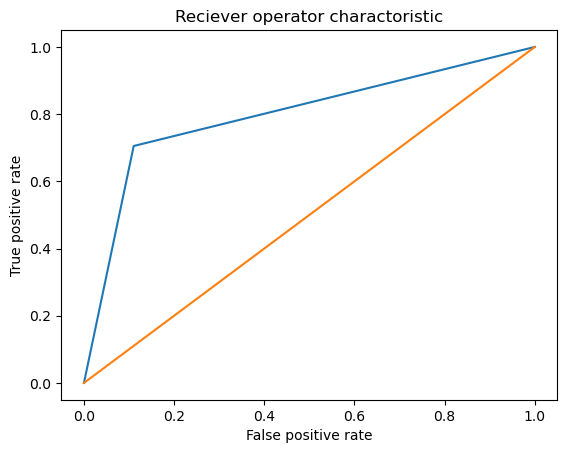

0.7973916887709992


In [2010]:
fpr,tpr,threshold=roc_curve(y_test,model_3.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,clf.predict(x_test))
print(auc_score)

The AUC Score is 80%

My model_1 has 87% AUC & Model_2 has 86% AUC and model_3 has 80% AUC. so as best model we may use model_1 & model_2